# Folder reader and tests

Download the [HRVs](https://physionet.org/content/rr-interval-healthy-subjects/1.0.0/)

In [1]:
import os
import numpy as np
import pandas as pd

def read_hrv_data(folder_path):
    data = {}
    
    # Loop through each file in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            file_path = os.path.join(folder_path, filename)
            
            # Read the file content
            with open(file_path, 'r') as file:
                # Read the lines and convert them to floats
                # print([line for line in file])
                #values = [float(line.strip()) if line.strip() != '' else np.nan for line in file ]
                values = [float(line.strip()) for line in file if line.strip() != '']
                data[filename] = np.array(values)
    
    return data

# Example usage:
folder_path = 'rr-interval-time-series-from-healthy-subjects'
hrv_data = read_hrv_data(folder_path)

lengths = list()
# Print the data from one file
for filename, values in hrv_data.items():
    print(f"Data from {filename}:")
    print(values)
    print(len(values))
    lengths.append(len(values))
    print()


Data from 000.txt:
[789. 727. 789. ... 727. 703. 703.]
80441

Data from 002.txt:
[735. 781. 742. ... 602. 672. 672.]
68029

Data from 003.txt:
[718. 672. 688. ... 539. 531. 531.]
108150

Data from 005.txt:
[797. 843. 829. ... 781. 750. 750.]
97925

Data from 006.txt:
[844. 813. 781. ... 844. 852. 852.]
89624

Data from 007.txt:
[704. 710. 727. ... 640. 649. 649.]
57333

Data from 008.txt:
[758. 774. 789. ... 851. 852. 852.]
98216

Data from 009.txt:
[641. 633. 640. ... 781. 742. 742.]
67263

Data from 010.txt:
[ 984.  969.  969. ... 1071. 1054. 1054.]
82080

Data from 011.txt:
[539. 539. 547. ... 813. 843. 843.]
110511

Data from 013.txt:
[664. 665. 656. ... 641. 632. 632.]
111521

Data from 4000.txt:
[438. 437. 430. ... 414. 407. 407.]
171328

Data from 4001.txt:
[375. 359. 328. ... 477. 484. 484.]
185563

Data from 4002.txt:
[453. 453. 453. ... 500. 477. 477.]
153896

Data from 4003.txt:
[398. 391. 399. ... 359. 359. 359.]
199057

Data from 4004.txt:
[375. 375. 383. ... 445. 453. 453

In [2]:
min(lengths)
min_length = min(lengths)
min_length 

35925

In [3]:
np.log2(min(lengths))

15.132700536232061

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import pymultifracs.mfa as mfa
from pymultifracs.utils import build_q_log

In [6]:
def test(values,j1,j2):
    dwt, lwt = mfa.mf_analysis_full(values,
    scaling_ranges = [[j1,j2]],
    q = build_q_log(1, 10, 20),
    n_cumul=2,
    p_exp=np.inf,
    gamint=0.0
)
    lwt_sf, lwt_cumul, lwt_mfs, hmin = lwt
    print(dwt.hmin)
    lwt_mfs.plot()
    sns.despine()
    plt.suptitle('')
    plt.ylim((0, 1.1))
    plt.xlim((0, 1.5))

In [7]:
2**13 +1

8193

In [8]:
hrv = hrv_data['000.txt']

In [9]:
hrv.shape

(80441,)

[[-0.21272126]]


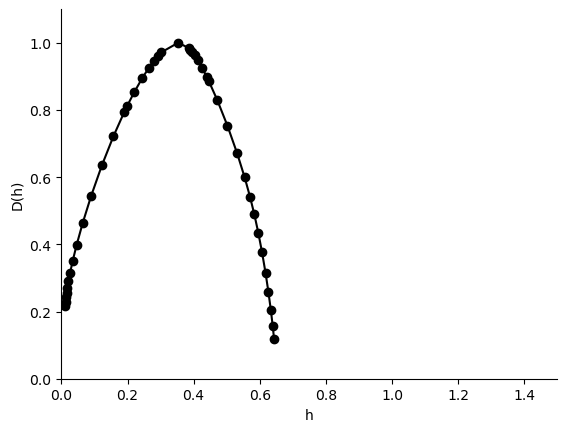

In [10]:
test(hrv,1,13)

In [11]:
# test(hrv,20,60)

In [12]:
# dwt, lwt = mfa.mf_analysis_full(test,
#     scaling_ranges = [[1,7]],
#     q = build_q_log(1, 10, 20),
#     n_cumul=2,
#     p_exp=np.inf,
#     gamint=0.0
# )



In [13]:
hrv_data2 = dict()

for key,value in hrv_data.items():
    print(value)
    hrv_data2[key] = value[:min_length]

[789. 727. 789. ... 727. 703. 703.]
[735. 781. 742. ... 602. 672. 672.]
[718. 672. 688. ... 539. 531. 531.]
[797. 843. 829. ... 781. 750. 750.]
[844. 813. 781. ... 844. 852. 852.]
[704. 710. 727. ... 640. 649. 649.]
[758. 774. 789. ... 851. 852. 852.]
[641. 633. 640. ... 781. 742. 742.]
[ 984.  969.  969. ... 1071. 1054. 1054.]
[539. 539. 547. ... 813. 843. 843.]
[664. 665. 656. ... 641. 632. 632.]
[438. 437. 430. ... 414. 407. 407.]
[375. 359. 328. ... 477. 484. 484.]
[453. 453. 453. ... 500. 477. 477.]
[398. 391. 399. ... 359. 359. 359.]
[375. 375. 383. ... 445. 453. 453.]
[407. 422. 398. ... 383. 383. 383.]
[414. 429. 446. ... 524. 508. 508.]
[399. 398. 391. ... 382. 391. 391.]
[422. 414. 414. ... 555. 547. 547.]
[ 359. 1031.  243. ...  351.  375.  375.]
[859. 937. 985. ... 954. 937. 937.]
[430. 437. 438. ... 539. 500. 500.]
[430. 421. 414. ... 437. 438. 438.]
[367. 680. 352. ... 422. 421. 421.]
[414. 414. 828. ... 446. 461. 461.]
[329. 648. 328. ... 429. 438. 438.]
[461. 469. 469. 

In [14]:
for value in hrv_data2.values():
    if len(value) !=35925:

        print(len(value))


In [15]:
df = pd.DataFrame.from_dict(hrv_data2)

In [16]:
df

,000.txt,002.txt,003.txt,005.txt,006.txt,007.txt,008.txt,009.txt,010.txt,011.txt,...,418.txt,419.txt,420.txt,421.txt,422.txt,423.txt,424.txt,425.txt,426.txt,427.txt
0,789.0,735.0,718.0,797.0,844.0,704.0,758.0,641.0,984.0,539.0,...,570.0,844.0,594.0,789.0,446.0,523.0,508.0,640.0,453.0,563.0
1,727.0,781.0,672.0,843.0,813.0,710.0,774.0,633.0,969.0,539.0,...,547.0,961.0,609.0,742.0,476.0,547.0,484.0,633.0,477.0,562.0
2,789.0,742.0,688.0,829.0,781.0,727.0,789.0,640.0,969.0,547.0,...,523.0,945.0,602.0,734.0,430.0,539.0,492.0,641.0,461.0,563.0
3,750.0,680.0,672.0,828.0,773.0,734.0,781.0,657.0,922.0,539.0,...,531.0,758.0,601.0,688.0,437.0,547.0,500.0,625.0,461.0,555.0
4,812.0,758.0,664.0,859.0,789.0,735.0,687.0,648.0,937.0,539.0,...,524.0,688.0,594.0,695.0,446.0,523.0,524.0,648.0,453.0,570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35920,1266.0,992.0,789.0,484.0,805.0,797.0,742.0,1289.0,1047.0,617.0,...,594.0,633.0,570.0,664.0,742.0,625.0,1219.0,820.0,579.0,797.0
35921,1211.0,1032.0,805.0,492.0,804.0,774.0,765.0,1219.0,969.0,610.0,...,539.0,602.0,547.0,617.0,829.0,586.0,1125.0,828.0,586.0,774.0
35922,1211.0,1039.0,828.0,485.0,797.0,742.0,727.0,1195.0,1015.0,625.0,...,539.0,594.0,563.0,625.0,929.0,562.0,1195.0,820.0,617.0,757.0
35923,1101.0,953.0,828.0,484.0,797.0,773.0,703.0,1266.0,1032.0,648.0,...,531.0,640.0,531.0,641.0,867.0,555.0,1109.0,774.0,570.0,821.0


In [17]:
hrvs = np.array(df).T


In [18]:
def plot_a_lot(hrvs):
    j1 = 1
    j2 = 11
    for i in range(hrvs.shape[0]):
        dwt, lwt = mfa.mf_analysis_full(hrvs[i],
        scaling_ranges = [[j1,j2]],
        q = build_q_log(1, 10, 20),
        n_cumul=2,
        p_exp=np.inf,
        gamint=0.0
        )
        lwt_sf, lwt_cumul, lwt_mfs, hmin = lwt
        # print(dwt.hmin)
        lwt_mfs.plot(color ='r')
        if i % 5 == 0:
            sns.despine()
            plt.suptitle('')
            plt.ylim((0, 1.1))
            plt.xlim((0, 1.5))
            plt.show()

c:\Users\aejog\anaconda3\Lib\site-packages\pymultifracs\mfspectrum.py:237: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko-" (-> color='k'). The keyword argument will take precedence.
  ax.errorbar(self.hq[:, scaling_range, 0], self.Dq[:, scaling_range, 0],


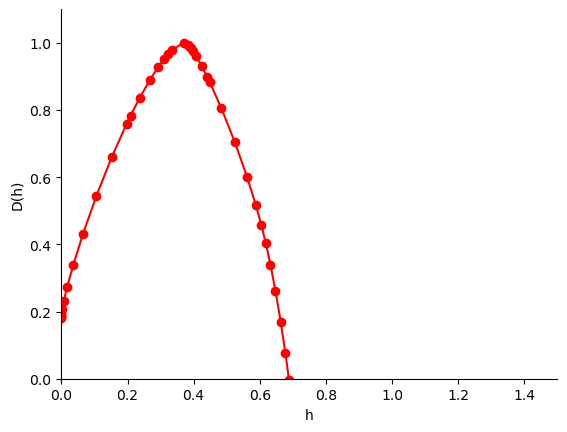

c:\Users\aejog\anaconda3\Lib\site-packages\pymultifracs\utils.py:87: RuntimeWarning: divide by zero encountered in power
  return np.power(array, exponent)
c:\Users\aejog\anaconda3\Lib\site-packages\pymultifracs\utils.py:76: RuntimeWarning: divide by zero encountered in reciprocal
  return array ** exponent
c:\Users\aejog\anaconda3\Lib\site-packages\pymultifracs\cumulants.py:265: RuntimeWarning: divide by zero encountered in log
  log_T_X_j = np.log(T_X_j)
c:\Users\aejog\anaconda3\Lib\site-packages\pymultifracs\mfspectrum.py:117: RuntimeWarning: invalid value encountered in divide
  R_j = temp / Z
c:\Users\aejog\anaconda3\Lib\site-packages\pymultifracs\mfspectrum.py:118: RuntimeWarning: divide by zero encountered in log2
  V[:, ind_j, :] = fixednansum(R_j * np.log2(mrq_values_j), axis=1)
c:\Users\aejog\anaconda3\Lib\site-packages\pymultifracs\mfspectrum.py:118: RuntimeWarning: invalid value encountered in multiply
  V[:, ind_j, :] = fixednansum(R_j * np.log2(mrq_values_j), axis=1)
c:\U

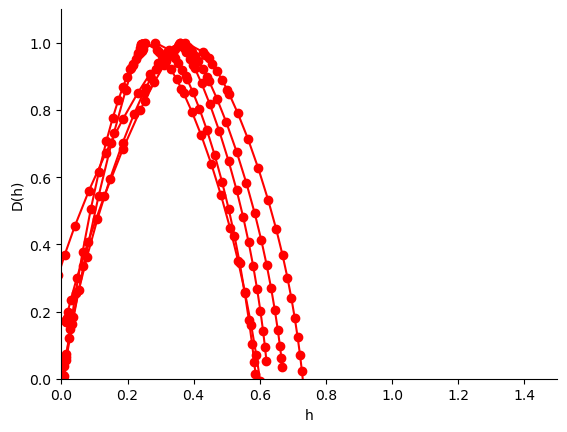

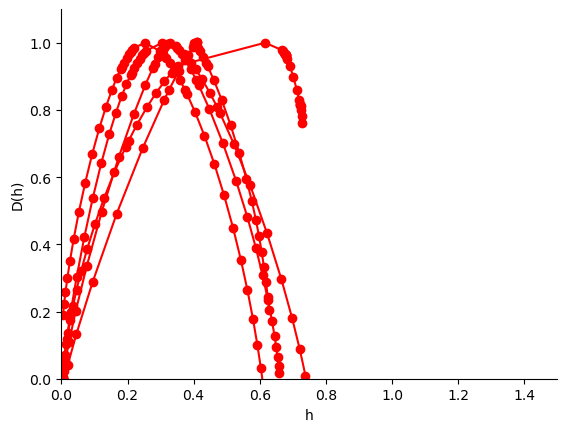

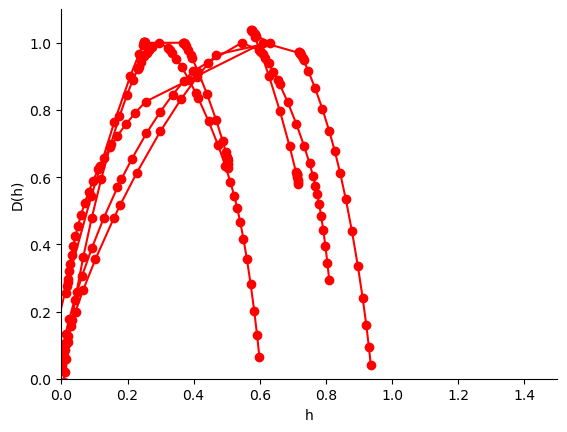

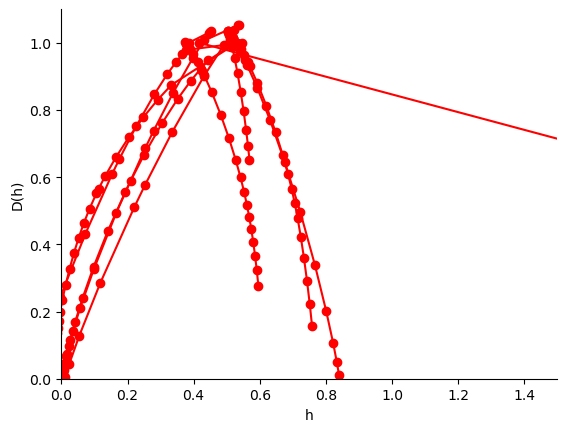

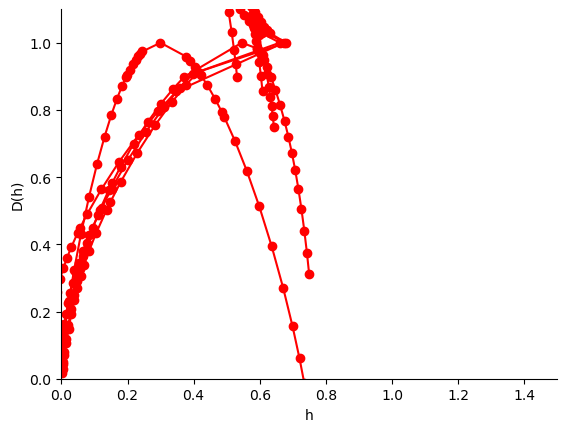

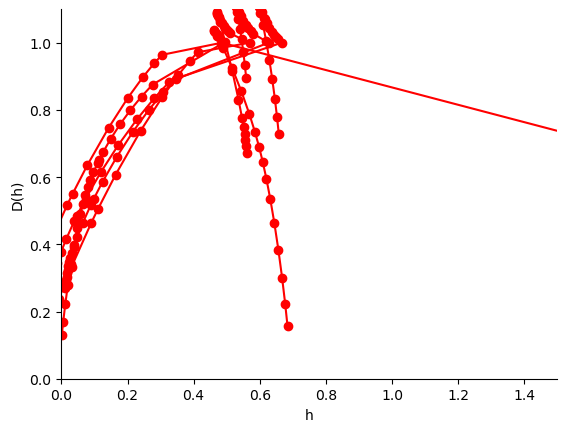

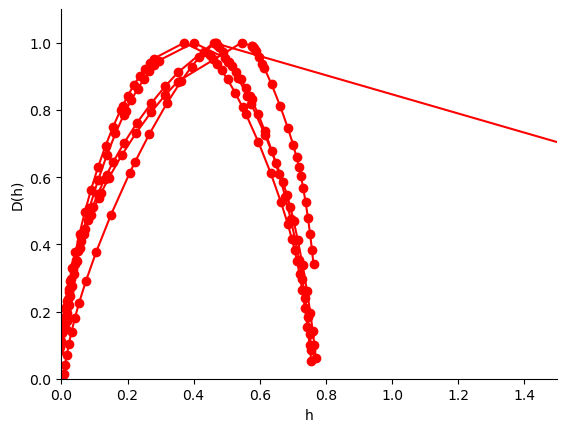

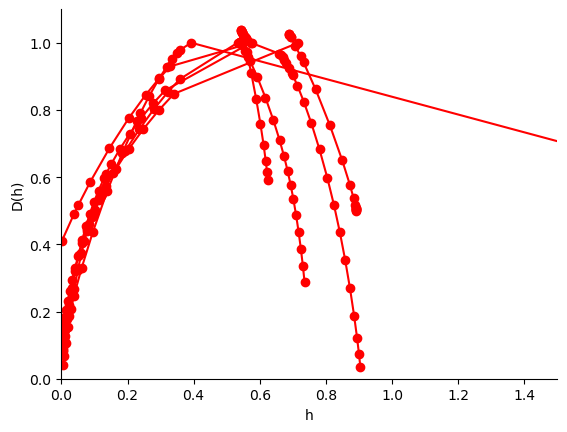

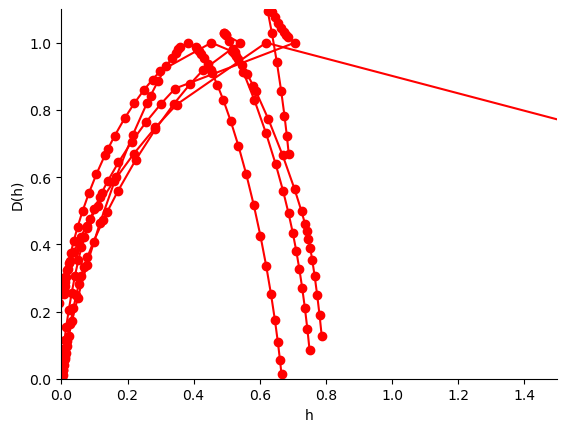

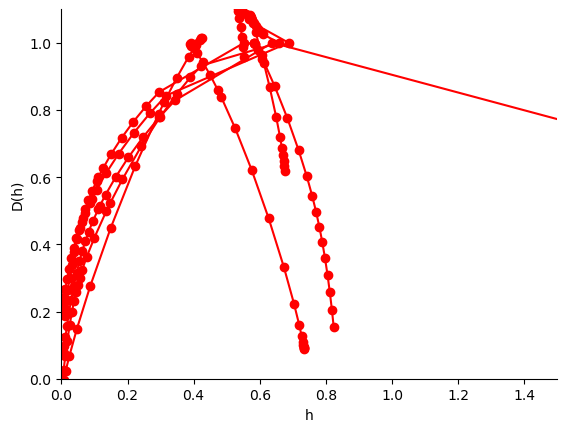

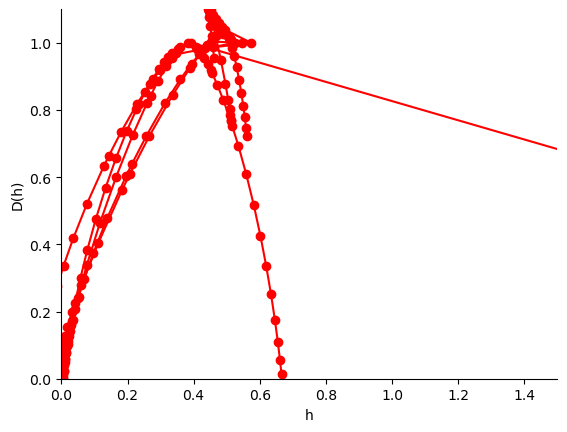

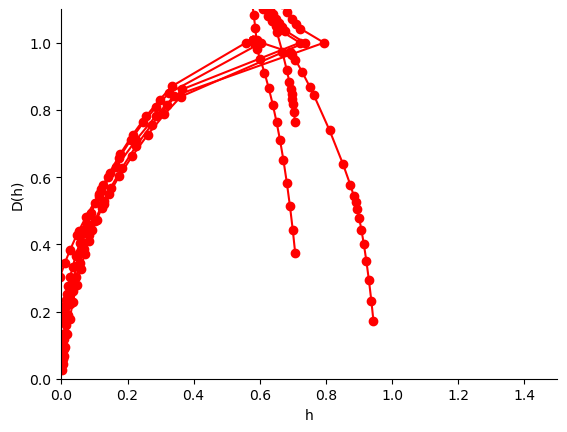

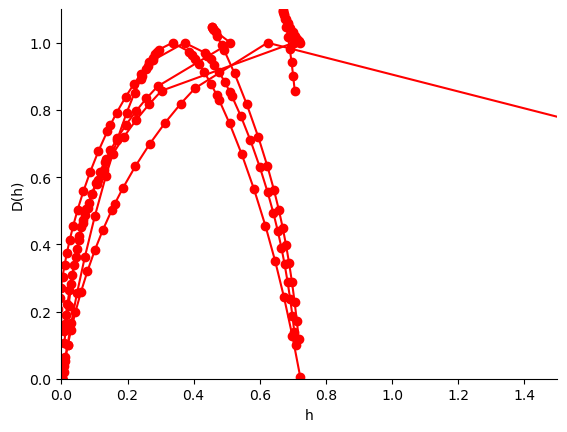

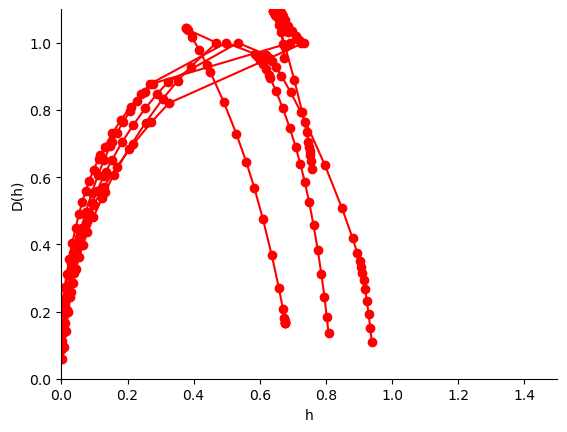

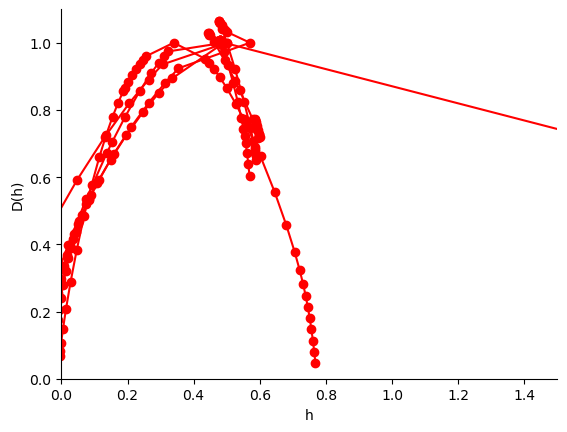

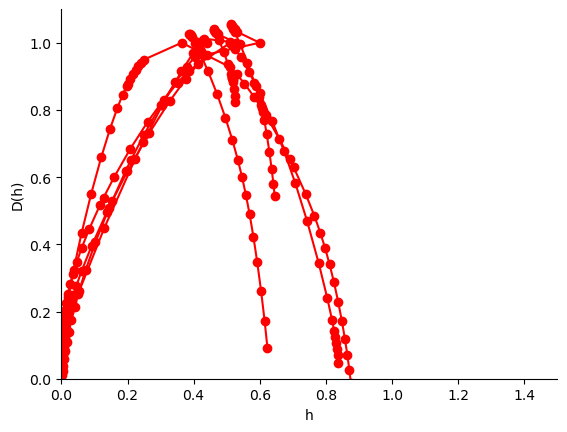

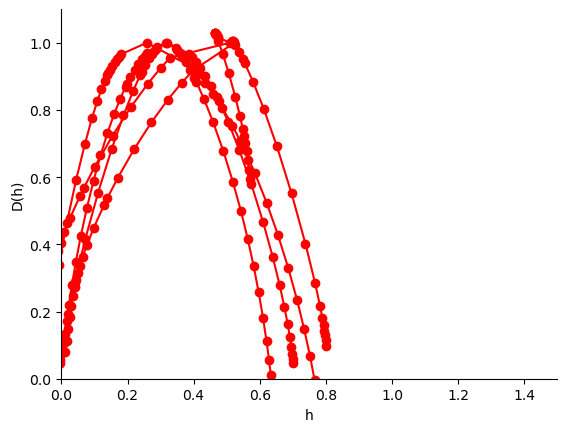

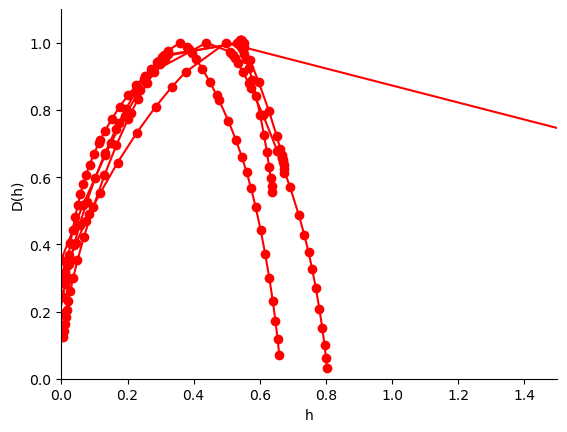

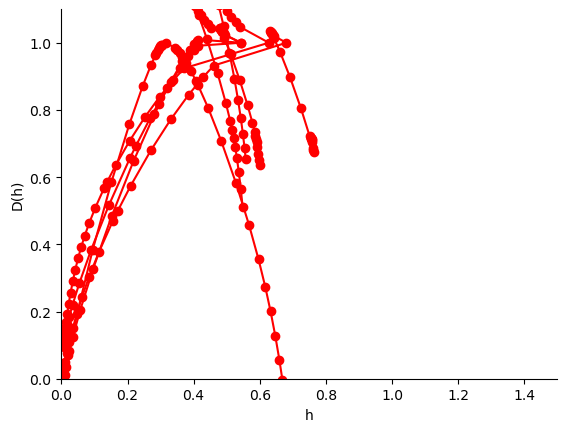

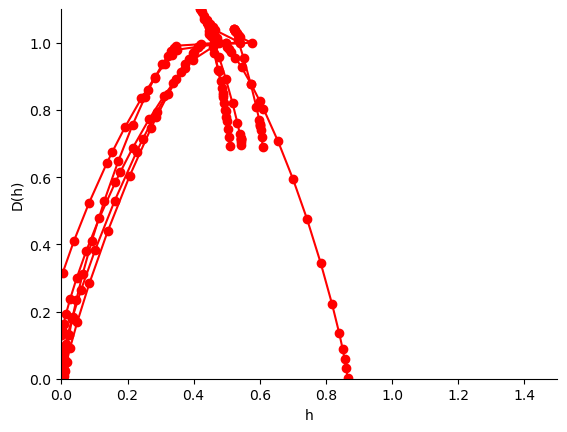

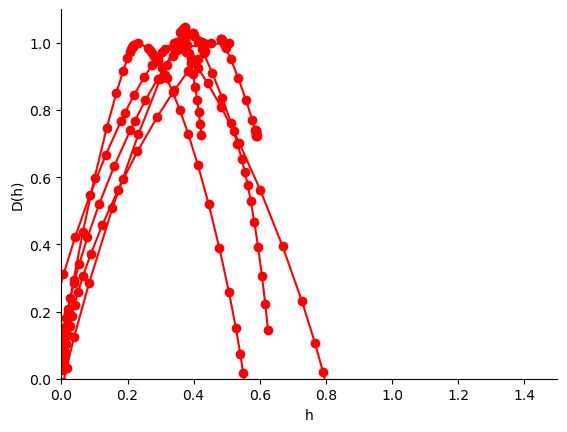

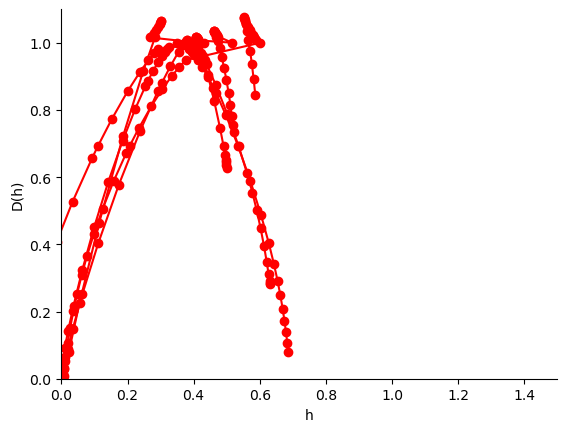

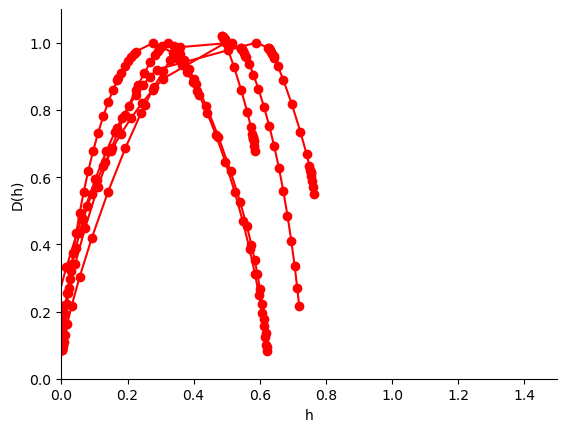

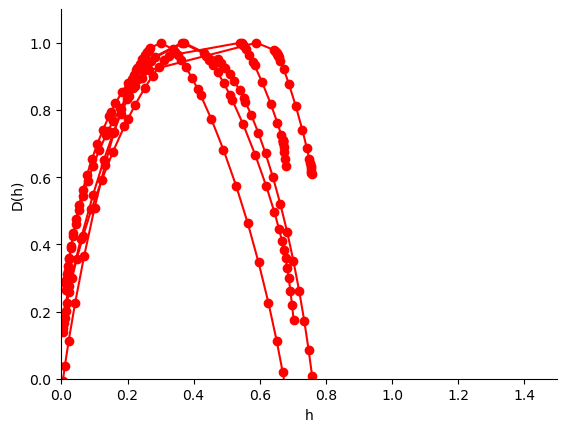

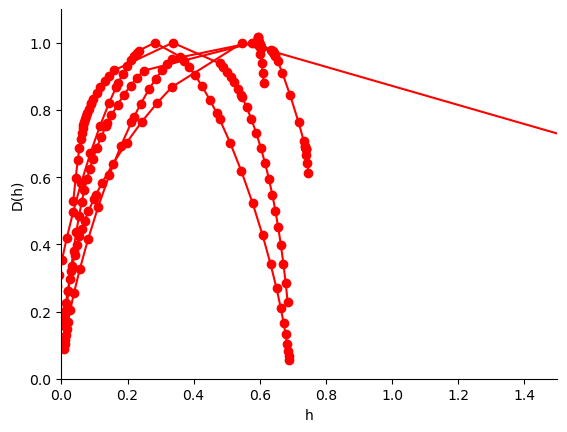

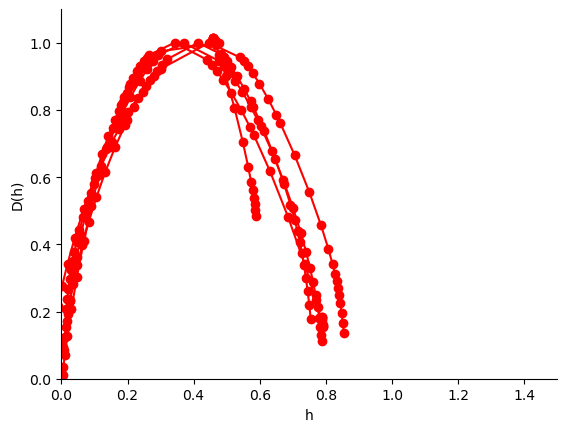

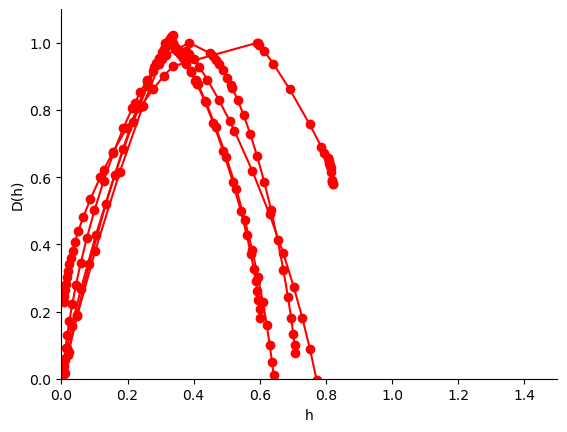

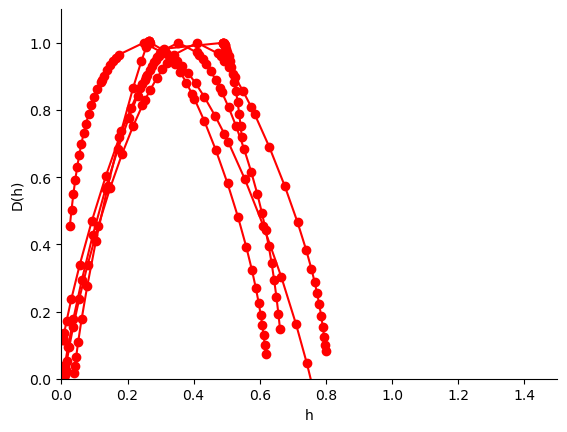

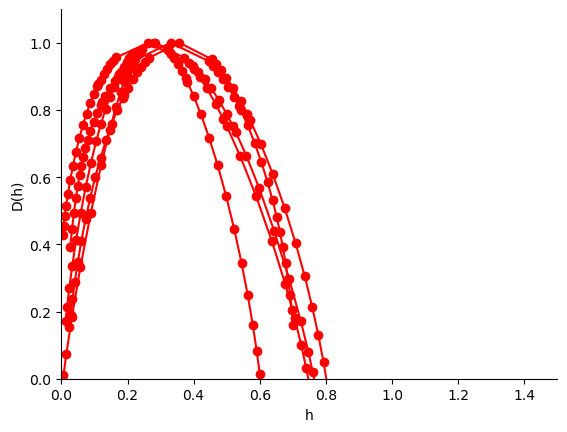

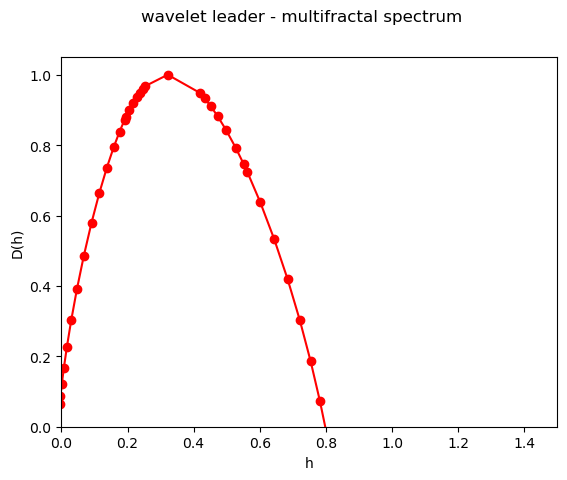

In [19]:
plot_a_lot(hrvs)

In [20]:
with open('rr-interval-time-series-from-healthy-subjects/000.txt', 'r') as file:
    for line in file:
        print([float(line.strip())])
        break

[789.0]
